# EDA

In [5]:
import pandas as pd
df = pd.read_csv("c:/Users/Quang/Customer-Segmentation/data/processed/cleaned_data.csv")

##### 1. Phân tích phân phối (Distribution Analysis)

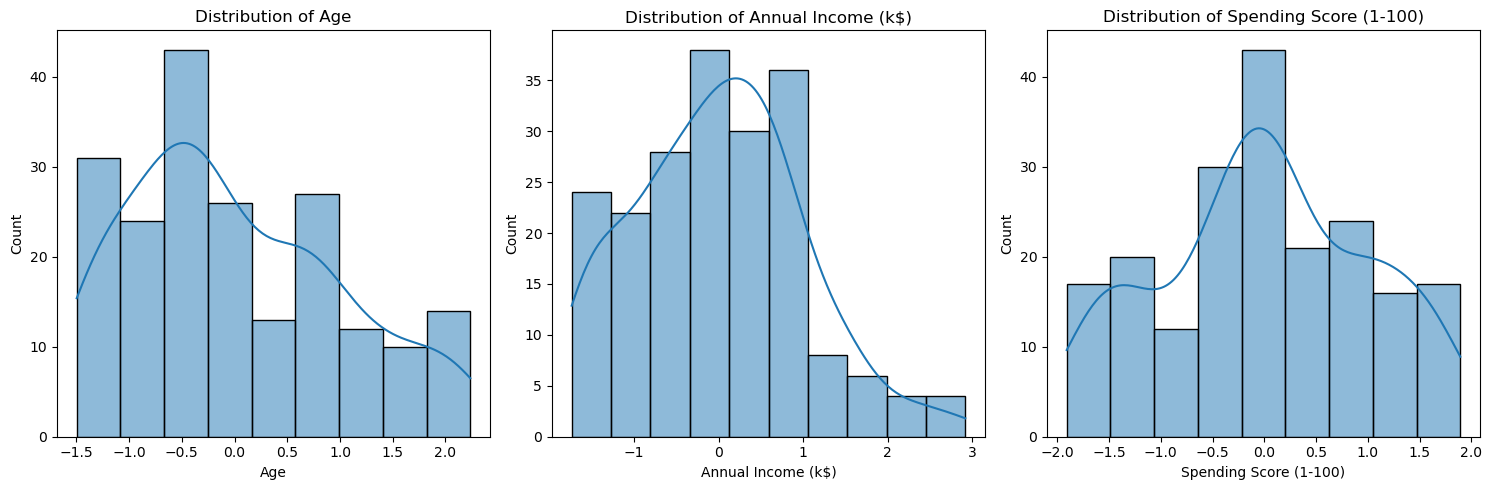

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân phối của Age, Annual Income, Spending Score
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/distributions.png')
plt.show()

##### 2. Phân tích mối quan hệ giữa các biến

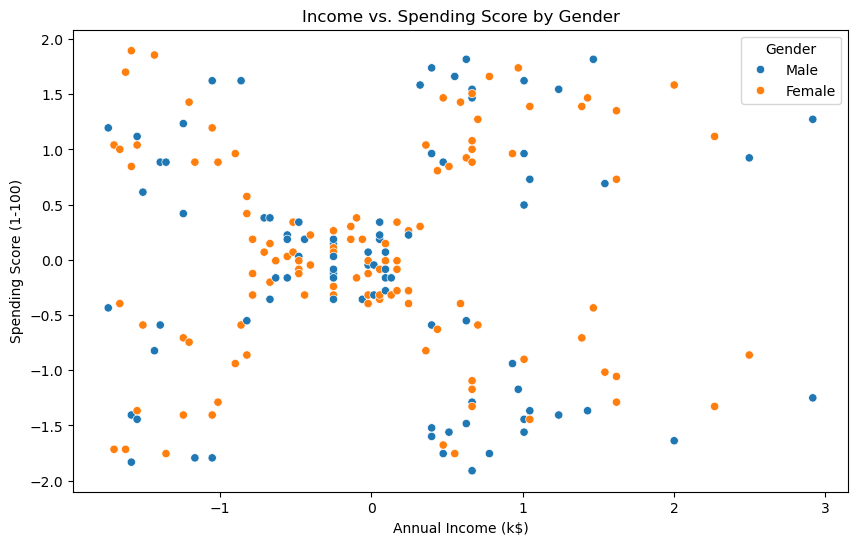

In [26]:
# Scatter plot giữa Annual Income và Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs. Spending Score by Gender')
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/income_vs_spending.png')
plt.show()

##### 3. Phân tích theo giới tính

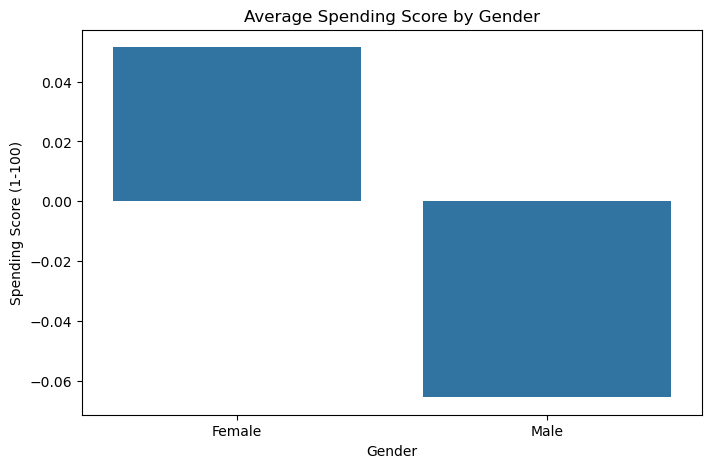

In [29]:
# So sánh điểm chi tiêu trung bình theo giới tính
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_spending, x='Gender', y='Spending Score (1-100)')
plt.title('Average Spending Score by Gender')
plt.savefig('c:/users/quang/customer-segmentation/reports/figures/gender_spending.png')
plt.show()

##### 4. Phân tích theo nhóm tuổi

In [54]:
age_mean = 38.85  # Giá trị trung bình của tuổi trước khi chuẩn hóa
age_std = 13.97   # Độ lệch chuẩn trước khi chuẩn hóa

# Chuyển Age từ chuẩn hóa về giá trị thực
df['Age_real'] = df['Age'] * age_std + age_mean

# Phân nhóm lại theo giá trị thực
df['Age_Group'] = pd.cut(df['Age_real'], bins=[0, 20, 30, 40, 50, 100], 
                         labels=['<20', '20-30', '30-40', '40-50', '50+'], 
                         include_lowest=True)

# Phân tích thu nhập và chi tiêu theo nhóm tuổi
age_group_stats = df.groupby('Age_Group',observed=True)[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(age_group_stats)


           Annual Income (k$)  Spending Score (1-100)
Age_Group                                            
<20                 -0.360409               -0.215574
20-30               -0.145213                0.660829
30-40                0.337700                0.326532
40-50                0.129345               -0.592079
50+                 -0.235972               -0.458094


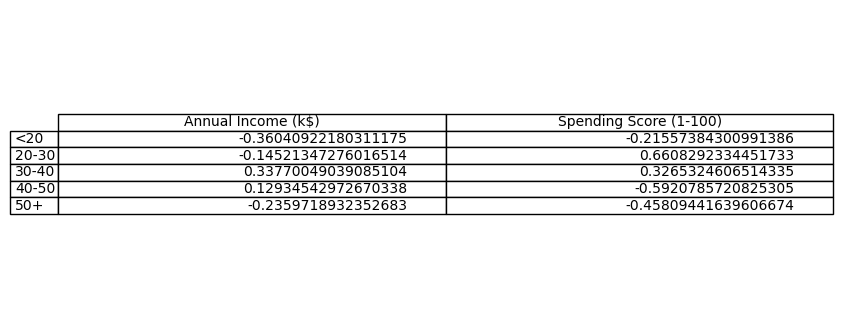

In [59]:
# Vẽ bảng thống kê age_group_stats dưới dạng hình ảnh
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=age_group_stats.values,
                colLabels=age_group_stats.columns,
                rowLabels=age_group_stats.index,
                loc='center')

table_image_path = 'c:/Users/Quang/Customer-Segmentation/reports/figures/age_group_stats.png'
plt.savefig(table_image_path, bbox_inches='tight')
plt.show()

##### 5. Heatmap tương quan

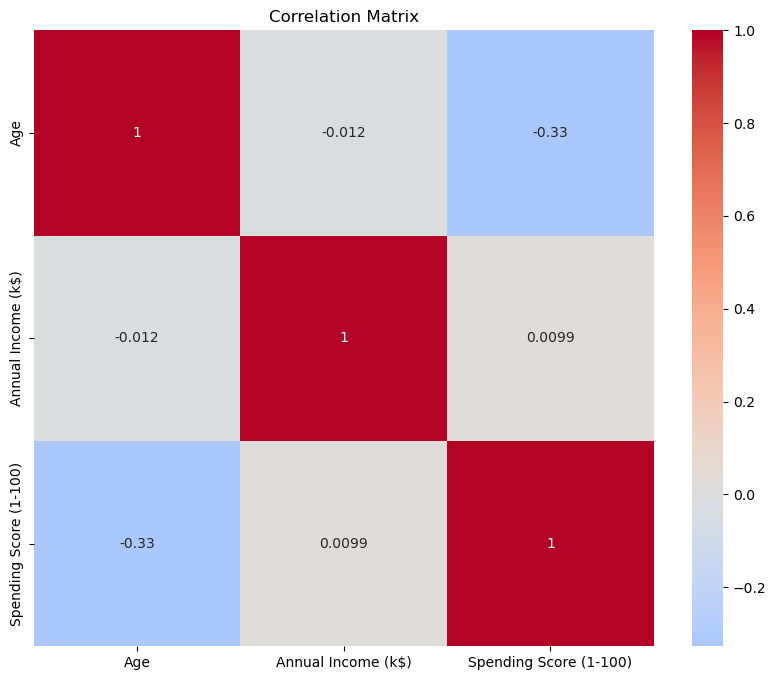

In [66]:
# Tính correlation matrix
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/correlation_heatmap.png')
plt.show()

##### 6. Pairplot tổng quan

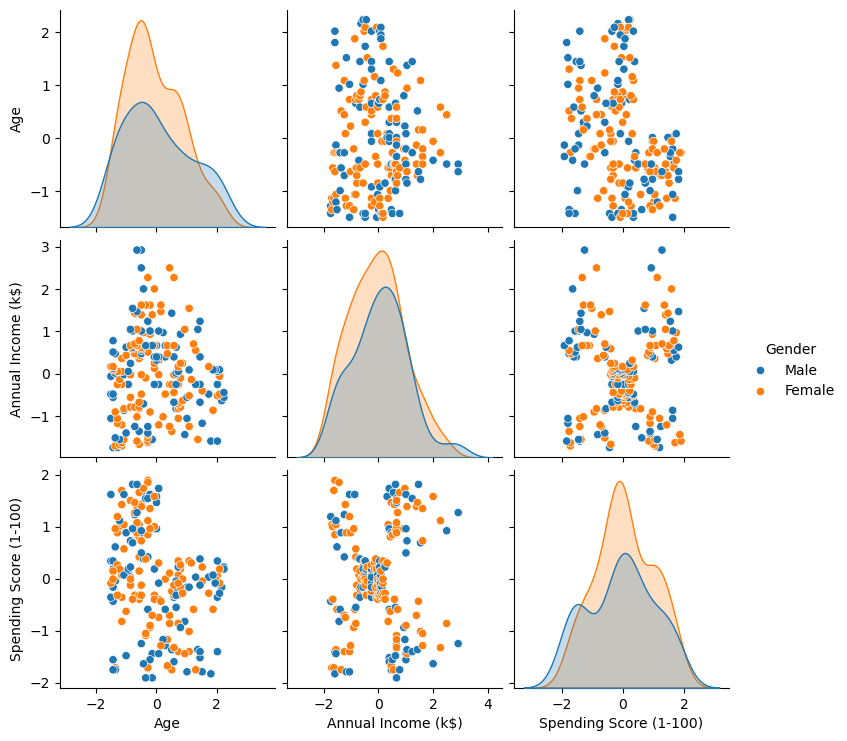

In [71]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/pairplot.png')

##### 7. Boxplot phát hiện outliers:

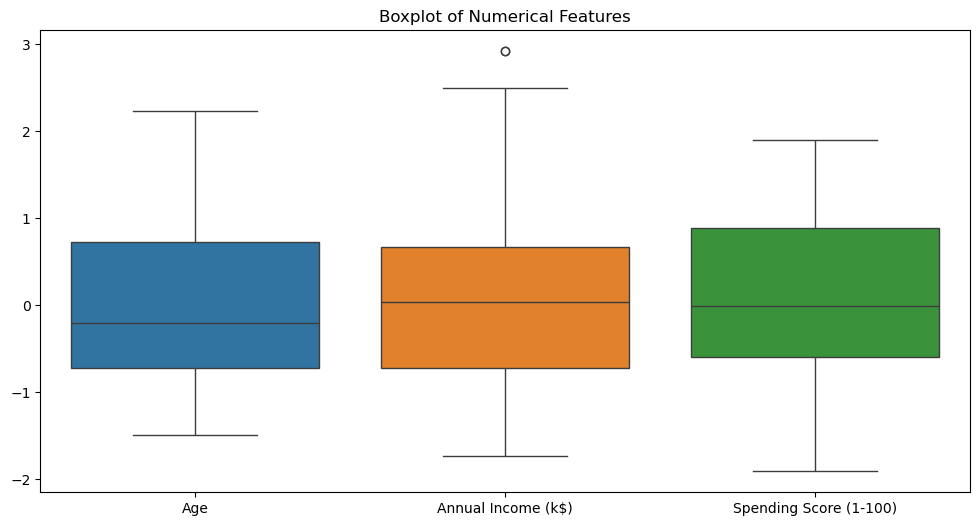

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot of Numerical Features')
plt.savefig('c:/Users/Quang/Customer-Segmentation/reports/figures/boxplot_outliers.png')

### Thêm tất cả hình ảnh vào eda_summary.md

In [83]:
import os

# Định nghĩa đường dẫn thư mục chứa ảnh và file Markdown
figures_path = "c:/Users/Quang/Customer-Segmentation/reports/figures/"
md_file = "c:/Users/Quang/Customer-Segmentation/reports/eda_summary.md"

# Liệt kê tất cả các file ảnh trong thư mục figures
image_files = sorted([f for f in os.listdir(figures_path) if f.endswith(".png")])

# Mở file Markdown để ghi nội dung mới
with open(md_file, 'w', encoding='utf-8') as f:
    f.write("# Exploratory Data Analysis (EDA)\n\n")

    # Duyệt qua từng file ảnh và thêm vào Markdown
    for img_file in image_files:
        img_name = img_file.replace("_", " ").replace(".png", "")
        f.write(f"## {img_name}\n")
        f.write(f"![{img_name}](figures/{img_file})\n\n")